In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce

In [3]:
df = pd.read_csv('data_complete.csv')
print(f"df shape: {df.shape}\ncolumns: {df.columns}")
categorical = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
numeric = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

df shape: (8523, 12)
columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight', 'Item_Visibility'],
      dtype='object')


In [6]:
df.corr(numeric_only=True)

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Visibility
Item_MRP,1.000000,0.005020,0.567574,0.025952,-0.006317
Outlet_Establishment_Year,0.005020,1.000000,-0.049135,-0.013452,-0.002746
Item_Outlet_Sales,0.567574,-0.049135,1.000000,0.013227,-0.022847
Item_Weight,0.025952,-0.013452,0.013227,1.000000,-0.022508
Item_Visibility,-0.006317,-0.002746,-0.022847,-0.022508,1.000000


<AxesSubplot: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

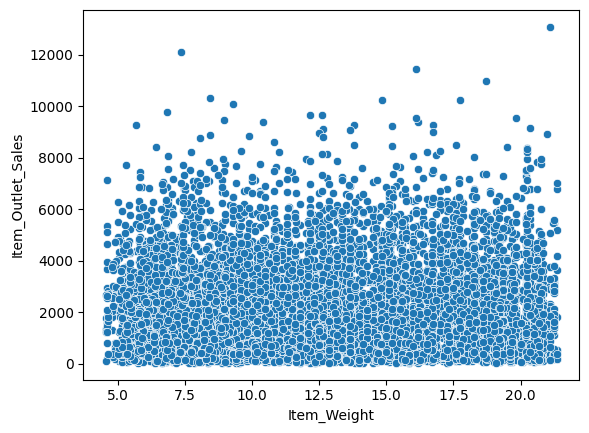

In [4]:
# Item_Weight
sns.scatterplot(data=df, x='Item_Weight', y='Item_Outlet_Sales')

In [7]:
item_identifier = df[['Outlet_Size', 'Item_Outlet_Sales']]
# item_identifier['Item_No'] = pd.factorize(item_identifier['Item_Identifier'])[0]
# df_0 = pd.DataFrame(item_identifier['Item_Identifier'].value_counts()).reset_index()
# item_identifier = item_identifier.merge(df_0,how='left', left_on='Item_Identifier', right_on='index')
# sns.scatterplot(data=item_identifier, x='Item_Identifier_y', y='Item_Outlet_Sales')
# sns.scatterplot(data=item_identifier, x='Item_No', y='Item_Outlet_Sales')
# enc = ce.CatBoostEncoder(cols=['Item_Identifier'])
# training = enc.fit_transform(item_identifier['Item_Identifier'], item_identifier['Item_Outlet_Sales'])
# res = pd.merge(item_identifier, training, left_index=True, right_index=True)
# sns.scatterplot(data=res, x='Item_Identifier_y', y='Item_Outlet_Sales')
# res[res['Item_Identifier_x'] == 'FDA15']
item_identifier.groupby(by=['Outlet_Size']).median()

,Item_Outlet_Sales
Outlet_Size,
High,2022.7004
Medium,2120.2401
Small,1090.5804
